<a href="https://colab.research.google.com/github/SergeiSa/Mechatronics-2023/blob/main/ColabNotebooks/Practice_2_Mechanical_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mechanical modeling**

Goals for today:
1. Recall 2 Newton's Law and Euler-Lagrange method
2. Recall ODEs and State space model
3. How to make simulations

## **Recall linear system representations**


### **Ordinary Differential Equations (ODE)**
The normal form of an $n$-th order differential equation is:
$$\mathbf{x}^{(n)}=\mathbf{f}(\mathbf{x}^{(n-1)},\mathbf{x}^{(n-2)},...,\ddot{\mathbf{x}},\dot{\mathbf{x}},\mathbf{x},t)$$
where $\mathbf{x} = \mathbf{x}(t)$ is the solution of the equation. It is a **dynamical system**.

The set $\{ \mathbf{x}, \ \dot{\mathbf{x}} \ ..., \ \mathbf{x}^{(n-1)} \}$ is called the **state** of the dynamical system.

In canonical form **linear ODE** as follows:
$$a_{n}z^{(n)} +a_{n-1}z^{(n-1)}+...+a_{2}\ddot z+a_{1}\dot z + a_0 z= b_0$$

### **State-space model**
**A state-space representation** is a mathematical model of a physical system as a set of input $\mathbf{u}$, output $\mathbf{y}$ and state variables $\mathbf{x}$ related by first-order differential equations (difference equations in discrete time).

State variables $\mathbf{x}$ are variables whose values evolve through time $t$ in a way that depends on the values they have at any given time and also depends on the externally imposed values of input variables $\mathbf{u}$. Output $\mathbf{y}$ depend on the values of the state variables $\mathbf{x}$.

In case if relationships between state, output and control is **linear**, we can formulate the model of system in following form:
\begin{equation}
\begin{cases}
\mathbf{\dot{x}} =\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
\mathbf{y}=\mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

where
*   $\mathbf{x} \in \mathbb{R}^n$ states of the system
*   $\mathbf{y} \in \mathbb{R}^l$ output vector
*   $\mathbf{u} \in \mathbb{R}^m$ control inputs
*   $\mathbf{A} \in \mathbb{R}^{n \times n}$ state matrix
*   $\mathbf{B} \in \mathbb{R}^{n \times m}$ input matrix
*   $\mathbf{C} \in \mathbb{R}^{l \times n}$ output matrix
*   $\mathbf{D} \in \mathbb{R}^{l \times m}$ feedforward matrix

## **Mechanical systems simulation**

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint

### **Mass-spring-damper**

![msd](https://drive.google.com/uc?export=view&id=1z4Ap53xd25U6r9wMmYb-68zINO3wCyLQ)

Let's recall second Newton law:
$$
m\ddot{x}=\sum{F}
$$

ODE for this system is:

$$ m\ddot{x}=-b\dot{x}-kx$$

Let's recall Euler-Lagrange method for mechanics:
1. Select generalized coordinates $q_a$ to describe the degrees of freedom of a mechanical system. These coordinates are completely arbitrary. They need not be the original Cartesian coordinates associated with an inertial frame. Indeed, there is no need for the coordinates to even be attached to an inertial frame. The index $a=1,2,...$ labels each one of the generalized coordinates; there is one coordinate for each degree of freedom.
2. In terms of the generalized coordinates, calculate the system's total kinetic energy $T$ and total potential energy $V$. Then form what is known as the Lagrangian function of the system, which is denoted $L(q_a,\dot{q}_a)$; this depends on the generalized coordinates qa and the generalized velocities $\dot{q}_a=dq_a/dt$. The Lagrangian is defined by:
$$L = T-V$$
3. Substitute the Lagrangian into the Euler-Lagrange equations. This returns an equation of motion for each generalized coordinate $q_a(t)$. There is one Euler-Lagrange equation for each generalized coordinate.

$$
\frac{d}{dt}\frac{\partial L}{\partial \dot{q_a}} - \frac{\partial L}{\partial q_a} = 0
$$

4. The rest of the recipe is concerned with solving the equations of motion. The methods for doing this are varied, and they depend on the particular situation, just as they do in the Newtonian formulation.

Let's find mass-spring-damper dynamics according to Euler-Lagrange method. Due to the fact that our system have friction the method will have a little changing. First of all we will introduce Rayleigh dissipation function $G$. The Rayleigh dissipation function, named after Lord Rayleigh, is a function used to handle the effects of velocity-proportional frictional forces in Lagrangian mechanics. If the frictional force on a particle with velocity $\vec {v}$ can be written as ${\vec {F}}_{f}=\vec {b}\cdot {\vec {v}}$, the Rayleigh dissipation function can be defined as:
$$
G(v) = \frac{1}{2}(b_xv^2_x+b_yv^2_y+b_zv^2_z)
$$

As friction is not conservative, it is included in the term $Q = \frac{\partial G}{\partial \dot{q_a}}$ of Lagrange's equations:

$$
\frac{d}{dt}\frac{\partial L}{\partial \dot{q_a}} - \frac{\partial L}{\partial q_a} + \frac{\partial G}{\partial \dot{q_a}}= 0
$$

For mass-spring-damper system will be following functions:

$$
T = \frac{m\dot{x}^2}{2}; \quad
V = \frac{kx^2}{2};\quad \text{then} \quad
L = \frac{m\dot{x}^2}{2} - \frac{kx^2}{2}; \quad \text{and} \quad
G = \frac{b\dot{x}^2}{2}
$$

If we substitude this fuction into the Euler-Lagrange equation we will get the same result as with Newton method:

$$ m\ddot{x}=-b\dot{x}-kx$$

System dynamics in state space form:

$$\begin{bmatrix} \dot{x}\\ \ddot{x} \end{bmatrix} = \begin{bmatrix}
0 & 1 \\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix} \begin{bmatrix} x\\ \dot{x} \end{bmatrix}$$

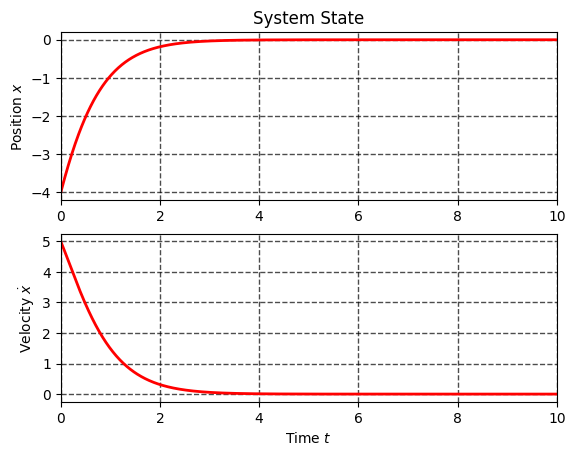

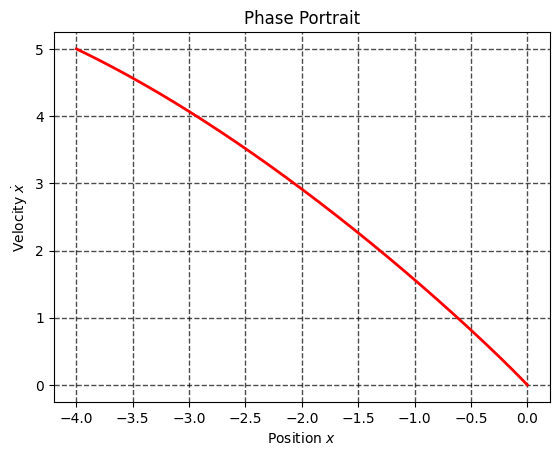

In [ ]:
#@markdown System parameters
m = 1 #@param {type:"slider", min:1, max:10, step:1}
k = 4 #@param {type:"slider", min:0, max:10, step:1}
b = 4 #@param {type:"slider", min:0, max:10, step:1}
A = np.array([[0, 1],
              [-k/m, -b/m]])

#@markdown Initial state
x_0 = -4 #@param {type:"slider", min:-10, max:10, step:1}
dx_0 = 5 #@param {type:"slider", min:-10, max:10, step:1}
x_init_state = np.array([x_0,
                         dx_0])  # initial state

#@markdown Simulation time
t_0 = 0
t_f = 10 #@param {type:"slider", min:1, max:10, step:1}
t = np.linspace(t_0, t_f, 1000)

def StateSpace(x, t, A): return np.dot(A, x)
solution = odeint(StateSpace, x_init_state, t, args=(A,))


subplot(2,1,1)
title("System State")
plot(t, solution[:,0], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t_0, t_f])
ylabel(r'Position ${x}$')

subplot(2,1,2)
plot(t, solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t_0, t_f])
ylabel(r'Velocity ${\dot{x}}$')
xlabel(r'Time $t$')
show()

title("Phase Portrait")
plot(solution[:,0], solution[:,1], linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'Position ${x}$')
ylabel(r'Velocity ${\dot{x}}$')
show()

### **Criticaly damped system**

Let's return to the original ODE for this system:

$$ m\ddot{x}=-b\dot{x}-kx$$

Substituting the species $x = e^{\lambda t}$ will lead this equation to the characteristic equation:

$$
\lambda^2 + \frac{b}{m}\lambda + \frac{k}{m} = 0
$$

The characteristic equation has a quadratic form, so it can be represented in the form:

$$
\lambda^2 + 2\zeta\omega_0\lambda + \omega_0^2 = 0
$$

when $\omega_0$ is natural frequency and $\zeta$ is critical damping coefficient, so:

$$
\begin{align}
\omega_0 = \sqrt{\frac{k}{m}}  &&&&
\zeta = \frac{b}{2 m \omega_0} = \frac{b}{2\sqrt{km}}\\
\end{align}
$$

This substitution allows us to look at the system in terms of the $\zeta$ characteristic. The roots of the characteristic equation are:

$$
\lambda_\pm = \omega_0\left(-\zeta \pm \sqrt{\zeta^2-1}\right)
$$

Depending on the dimensionality of the coefficient $\zeta$, the roots of the characteristic equation can become both real and complex numbers.

**Undamped system:** if $\zeta = 0$. Then the roots is: $\lambda_\pm = \pm\omega_0i$

Then solution will be following $x = c_1e^{iwt} + c_2e^{-iwt}$. According to the [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) and  [method for solving linear differential equations with constant coefficients](http://hm.tpu.ru/AVTF/textbook1/11.pdf) the solution for such system will be following:

$$
x = C_1\cos{\omega_0 t} + C_2\cos{\omega_0 t}
$$

This case is extremely rare in the natural world with the closest examples being cases where friction was purposefully reduced to minimal values.

**Underdamped system:** if $0 < \zeta < 1$. Then the roots is: $\lambda_\pm = -\omega_0\zeta\pm i\omega_0\sqrt{1-\zeta^2}$. The solution for this system is:

$$
x = e^{-\zeta\omega_0t} \left( C_1\cos{\omega_d t} + C_2\cos{\omega_d t} \right)
$$
when $\omega_d = \omega_0\sqrt{1-\zeta^2}$ is the natural frequency of the damped oscillations.

**Overdamped system:** when $\zeta > 1$. Then the roots is: $\lambda_\pm = -\omega_0\zeta\pm \omega_0\sqrt{\zeta^2-1}$. The system will behave as follows:

$$
x = C_1e^{\lambda_-}+C_2e^{\lambda_+}
$$

Situations where overdamping is practical tend to have tragic outcomes if overshooting occurs, usually electrical rather than mechanical. For example, landing a plane in autopilot: if the system overshoots and releases landing gear too late, the outcome would be a disaster.

**Critically damped systems:** when $\zeta = 1$. Then the roots is: $\lambda_\pm = -\omega_0$. Equation describing the state of the system in this case:

$$
x = (C_1t + C_2)e^{-\omega_0t}
$$

This is the border between the overdamped and underdamped cases, and is referred to as critically damped. This turns out to be a desirable outcome in many cases where engineering design of a damped oscillator is required (e.g., a door closing mechanism).

Zeta = 0 b = 0.0
Zeta = 0.5 b = 2.0
Zeta = 1 b = 4.0
Zeta = 1.5 b = 6.0


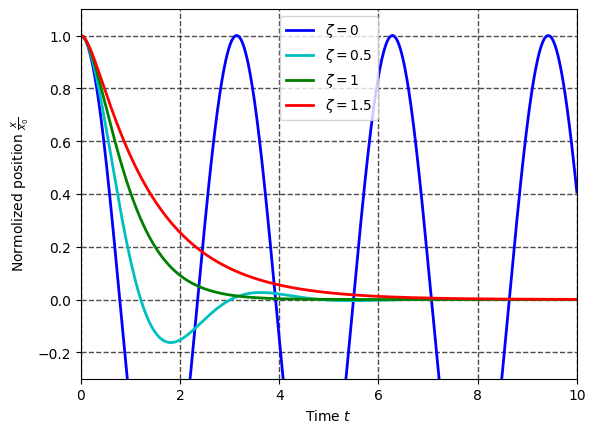

In [ ]:
#@markdown System parameters
m = 1
k = 4
zeta_undamped = 0
zeta_underdamped = 0.5 #@param {type:"slider", min:0.1, max:0.9, step:0.1}
zeta_cd = 1
zeta_overdamped = 1.5 #@param {type:"slider", min:1.1, max:1.9, step:0.1}
zetas = [zeta_undamped, zeta_underdamped, zeta_cd, zeta_overdamped]
zeta_colors = ['b', 'c', 'g', 'r']

#@markdown Initial state
x_0 = -1 #@param {type:"slider", min:-10, max:10, step:1}
dx_0 = 0 #@param {type:"slider", min:-10, max:10, step:1}
x_init_state = np.array([x_0,
                         dx_0])  # initial state

#@markdown Simulation time
t_0 = 0
t_f = 10 #@param {type:"slider", min:1, max:10, step:1}
t = np.linspace(t_0, t_f, 1000)

def b_calculation(m, k, zeta): return zeta*(2*np.sqrt(m*k))
def A_matrix(m, k, b): return np.array([[0, 1], [-k/m, -b/m]])
def StateSpace(x, t, A): return np.dot(A, x)

for i, zeta in enumerate(zetas):
  b = b_calculation(m, k, zeta)
  print('Zeta =', zeta, 'b =', b)
  A = A_matrix(m, k, b)
  solution = odeint(StateSpace, x_init_state, t, args=(A,))
  label = r'$\zeta = $'+str(zeta)
  plot(t, solution[:,0]/x_0, linewidth=2.0, color=zeta_colors[i], label=label)

grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Time $t$')
ylabel(r'Normolized position $\frac{x}{x_0}$')
xlim([t_0, t_f])
ylim([-0.3, 1.1])
legend()
show()

### **Double mass problem**

![msd](https://drive.google.com/uc?export=view&id=1q3B7n_eBlMfke2IY5O9qvSRQBmdSUvh4)



> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion and according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system for different values of $m_1$, $m_2$, $k_1$, $k_2$ and $k_3$
> 4. Draw a graph of the system state vs. time and a phase portrait of the system
> 5. Simulate system with $m_1=m_2$ and $k_1=k_2=k_3$. What the differents in behaviour with system with different values.
> 5. Repeat steps for system with viscosy friction $b$ between mass and floor. Take $m_1=m_2$ and $k_1=k_2=k_3$. What is the differents in behaviour with system without friction.

In [ ]:
# put your code here

### **Cart pole**
![cp](https://drive.google.com/uc?export=view&id=1wxbdRlUzJOcMtF9NVZ53N07i7azMbhi0)

> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion or according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system with following values $l = 1$, $m = 1$, $M = 2$, $F = 0.01$, $\theta_0 = \frac{\pi}{20}$ and $x_0=0$

In [ ]:
# put your code here

### **Planar Quadrotor**
![pq](https://drive.google.com/uc?export=view&id=1jdfD5DAcysgKl5PGmjuv4ZRdf3COGe_D)

> **Tasks**
>
> 1. Write the equation of motion of the system according to Newton's second law of motion or according to Euler Lagrange method
> 2. Bring the system into a state space model
> 3. Simulate the system with following values $m = 0.1$, $u_1 = 1$, $u_2 = 2$, $g = 9.8$, $\theta_0 = \frac{\pi}{30}$, $x_0=0$ and $y_0=0$

In [ ]:
# put your code here